<h1 align="center">Customer Segmentation</h1>
<img src="https://www.segmentify.com/wp-content/uploads/2021/08/Top-Customer-Segmentation-Examples-every-Marketer-Needs-to-Know.png" style="display:block; margin-left:auto; margin-right:auto; width:100%;">


**Customer Personality Analysis**  stands as a systematic approach to scrutinize an organization's ideal customer profile. This process delves into the depths of a business's clientele, unearthing profound insights that empower companies to tailor their offerings to the unique needs, behaviors, and concerns of diverse customer segments.



*   CPA unveils the intricate characteristics that define a company's ideal
customer base, enabling businesses to identify their most valuable and loyal patrons.
*   By delving into customer demographics, psychographics, and behavioral data, CPA provides businesses with a comprehensive understanding of their target audience, enabling them to develop personalized marketing campaigns and product strategies that resonate effectively with their customer base.


*   CPA facilitates the identification of untapped customer segments, allowing businesses to expand their reach and attract new clientele with tailored offerings.
*   CPA serves as a valuable tool for understanding customer preferences and evolving customer trends, enabling businesses to adapt their products and services to remain competitive and meet the ever-changing needs of their clientele.

In essence, CPA serves as a compass for businesses, guiding them towards a deeper understanding of their customers and enabling them to forge stronger relationships, optimize product offerings, and enhance customer satisfaction.


<center><h3 >
<b>Importing Libraries and Data</h3></center>
</div>



In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.count()

,0
ID,2240
Year_Birth,2240
Education,2240
Marital_Status,2240
Income,2216
Kidhome,2240
Teenhome,2240
Dt_Customer,2240
Recency,2240
MntWines,2240


here we can see for our analysis only that count is coming 2240 for all unique rows but for income it comes 2216 as we know from data.isnull().sum() value that 24 people have income as 0.

In [ ]:
data[data.isnull().any(axis=True)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Above all rows represent income = 0

In [ ]:
data = data.dropna()



<center><h3 >
<b>Handling Missing Values</h3></center>
</div>



In [ ]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


as we can see we removed all the values which had income 0 as they would have had negative impact on ML model

In [ ]:
data.duplicated().sum()

np.int64(0)



<center><h3 >
<b>Feature Engineering</h3></center>
</div>



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)

In [ ]:
data['Dt_Customer'].dtype

dtype('<M8[ns]')

In [ ]:
print("The oldest customer's enrollment of date in the records: ", min(data['Dt_Customer']))
print("The newest customer's enrollment of date in the records: ", max(data['Dt_Customer']))

The oldest customer's enrollment of date in the records:  2012-07-30 00:00:00
The newest customer's enrollment of date in the records:  2014-06-29 00:00:00


We will make a graph for **AGE Distribution**

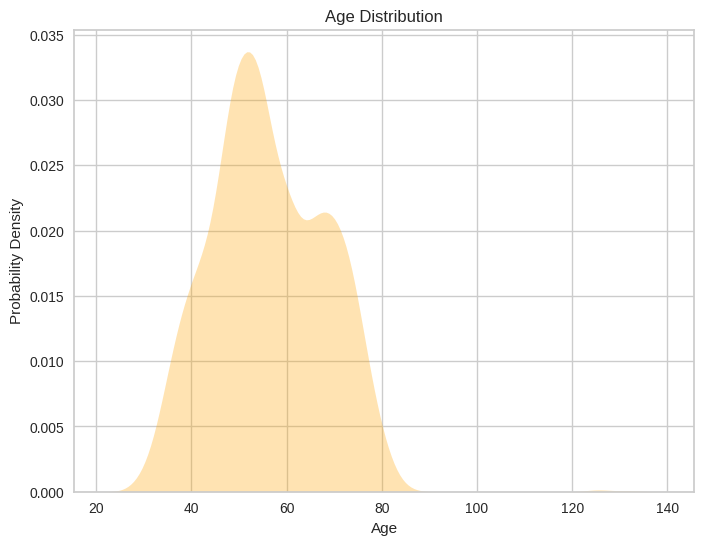

In [ ]:
data['Age'] = 2025 - data['Year_Birth']
plt.figure(figsize=(8, 6))
axes = plt.axes()
sns.kdeplot(
    data=data, #here lhs data is for the data that we will be entering while the rhs one is name of csv file saved as data by us
    x="Age",
    fill=True, color='orange', alpha=0.3, linewidth=0,
    ax=axes
)
axes.set_title("Age Distribution")
axes.set_ylabel("Probability Density")
plt.show()


**Customers are between the age of 18 and 80**


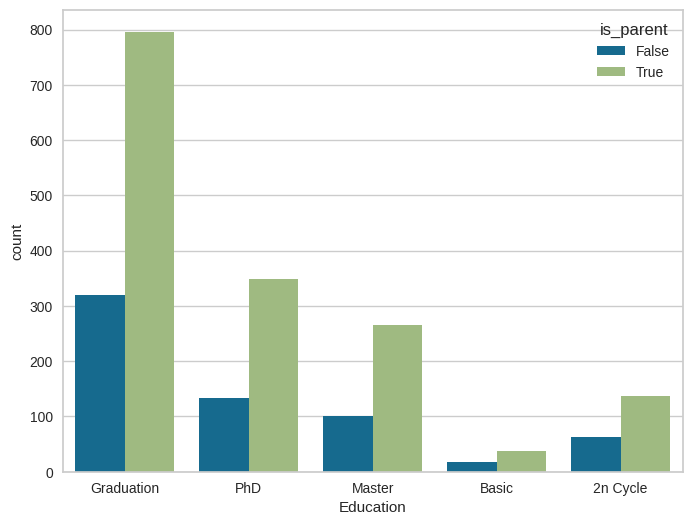

In [ ]:
data["is_parent"] = (data[["Kidhome", "Teenhome"]].sum(axis=1) > 0).astype(bool)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Education", hue="is_parent")
x_label_text = "Education"
y_label_text = "Count"
plt.show()

In [ ]:
data['is_parent'].info()

<class 'pandas.core.series.Series'>
Index: 2216 entries, 0 to 2239
Series name: is_parent
Non-Null Count  Dtype
--------------  -----
2216 non-null   bool 
dtypes: bool(1)
memory usage: 19.5 KB


Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [ ]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [ ]:
print(data['Spent'])

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2216, dtype: int64


Which customer spent the most?

In [ ]:
print("The person who spent the most, spent", max(data['Spent']))

The person who spent the most, spent 2525


In [ ]:
print("The person who spent the least, spent", min(data['Spent']))

The person who spent the least, spent 5


For clarity we will rename the columns

In [ ]:
data = data.rename(
    columns={
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold",
    }
)

In [ ]:
data #as we can see the names of columns changed and also new coulmns which we made earlier(age,is_parent,spent) are visible

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,is_parent,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,False,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,True,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,False,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,True,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,True,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,58,True,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,79,True,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,44,False,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,69,True,843


Lets see how many customers have partners and how many are alone

In [ ]:
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

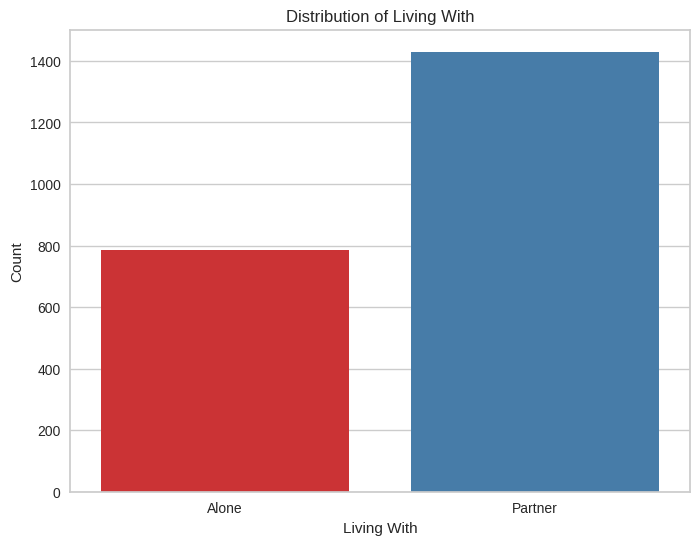

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Living_With', data=data, palette='Set1')
plt.xlabel('Living With')
plt.ylabel('Count')
plt.title('Distribution of Living With')
plt.show()

Understanding Family distribution

In [ ]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [ ]:
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']

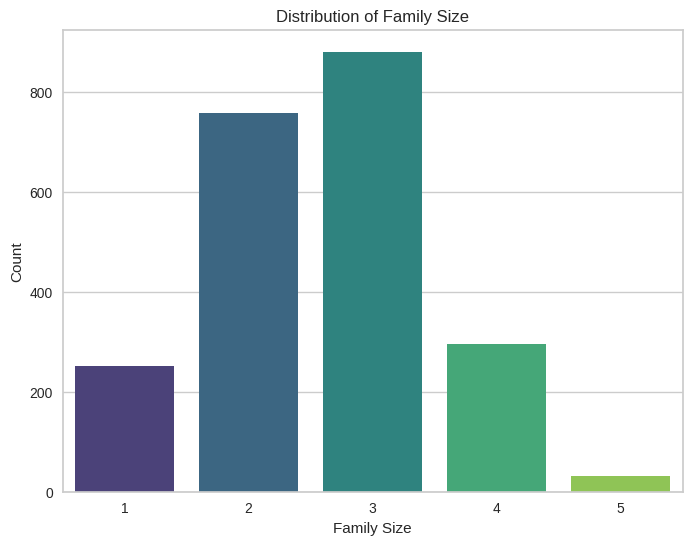

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Family_Size', data=data, palette='viridis')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Distribution of Family Size')
plt.show()

Clarifying education level into undergraduation, graduation, post graduation

In [ ]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,is_parent,Spent,Living_With,Children,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,False,1617,Alone,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,True,27,Alone,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,False,776,Partner,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,True,53,Partner,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,True,422,Partner,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,58,True,1341,Partner,1,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,79,True,444,Partner,3,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,44,False,1241,Alone,0,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,69,True,843,Partner,1,3


In [ ]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

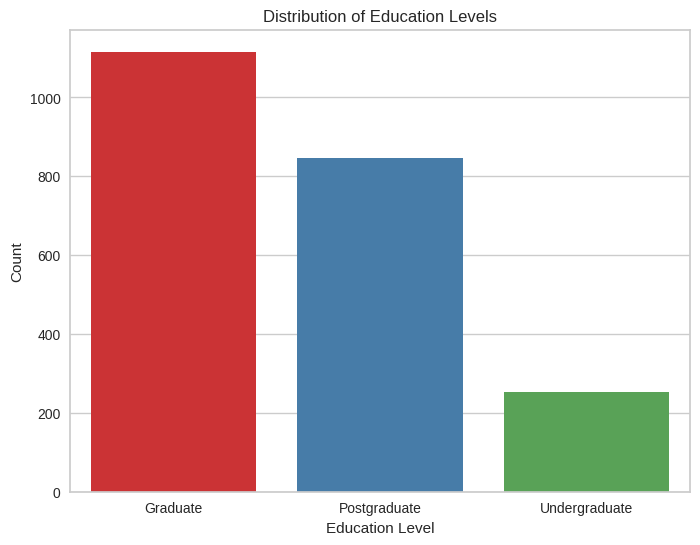

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=data, palette='Set1')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

Dropping some of the redundant features

In [ ]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,is_parent,Spent,Living_With,Children,Family_Size
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68,False,1617,Alone,0,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71,True,27,Alone,2,3
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60,False,776,Partner,0,2
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41,True,53,Partner,1,3
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44,True,422,Partner,1,3



<center><h3 >
<b>Data Analysis and Visualization</h3></center>
</div>



In [ ]:
data.shape

(2216, 29)

In [ ]:
data.describe(include=object).T

,count,unique,top,freq
Education,2216,3,Graduate,1116
Living_With,2216,2,Partner,1430


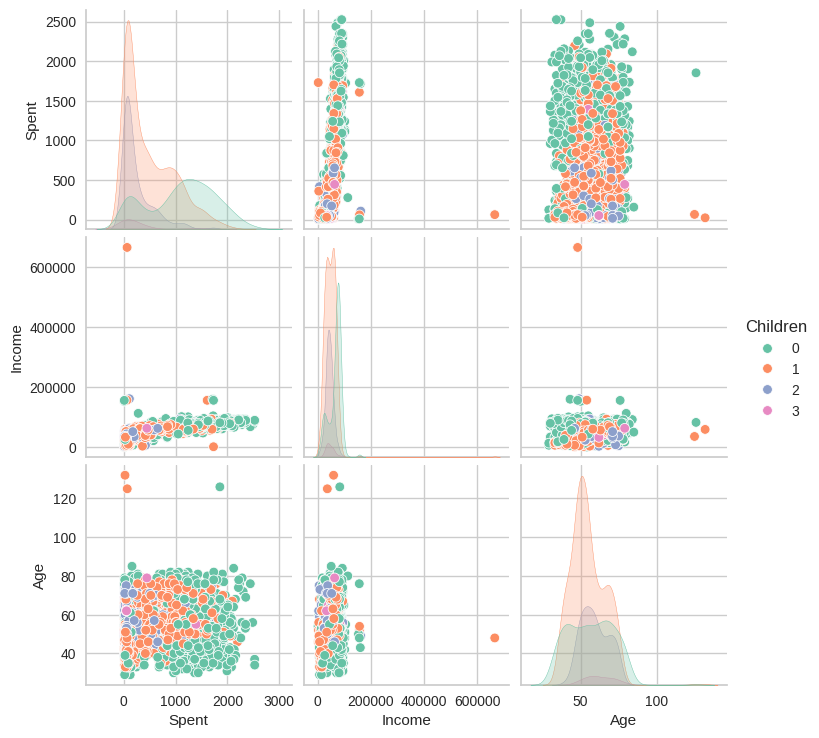

In [ ]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='Set2')

In [ ]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,56.179603,607.075361,0.947202,2.592509
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.000000,0.000000,1.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,69.000000,0.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,396.500000,1.000000,3.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,1048.000000,1.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,132.000000,2525.000000,3.000000,5.000000


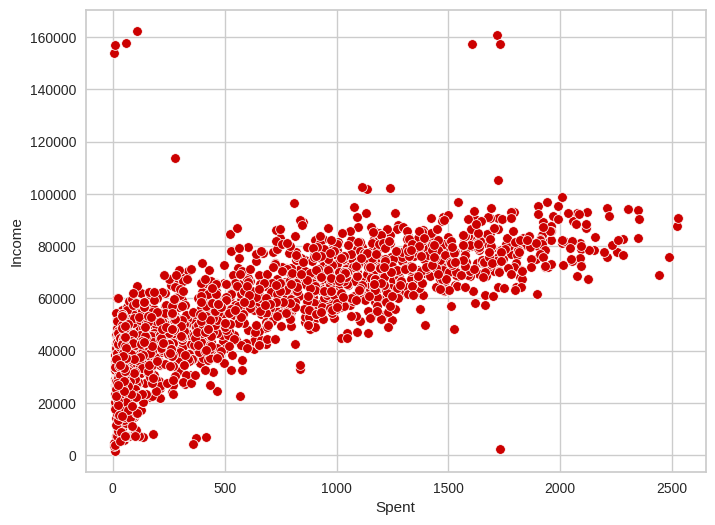

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');

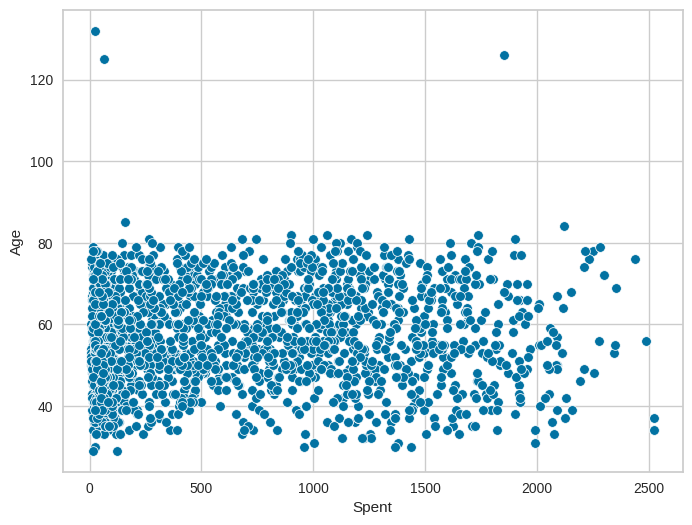

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Spent'], y=data['Age']);

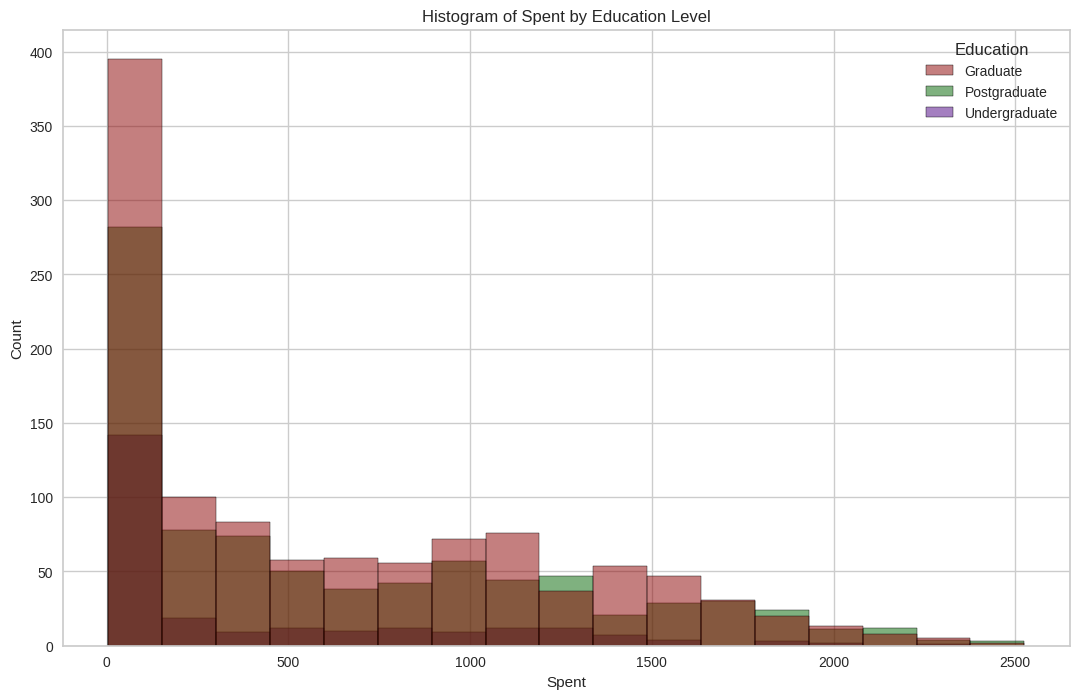

In [ ]:
dark_colors = ["#8B0000", "#006400", "#4B0082"]

plt.figure(figsize=(13, 8))
sns.histplot(x=data['Spent'], hue=data['Education'], palette=dark_colors)
plt.xlabel('Spent')
plt.ylabel('Count')
plt.title('Histogram of Spent by Education Level')
plt.show()


<Axes: ylabel='count'>

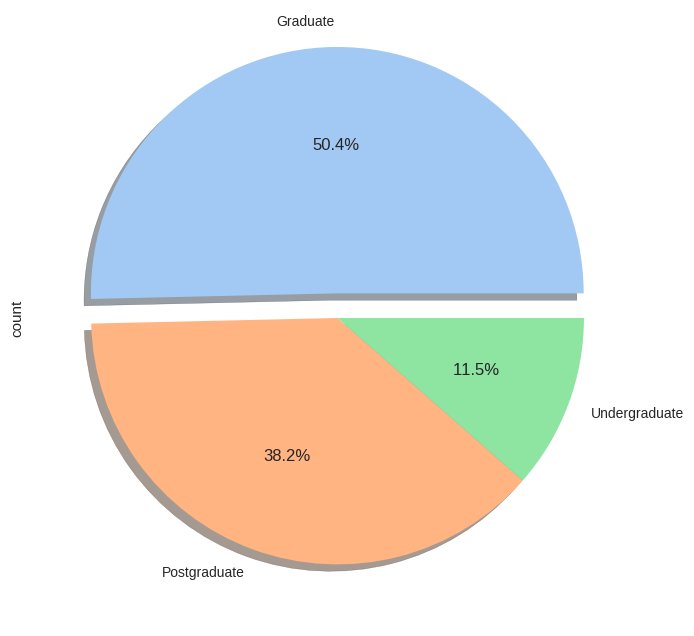

In [ ]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('pastel'))

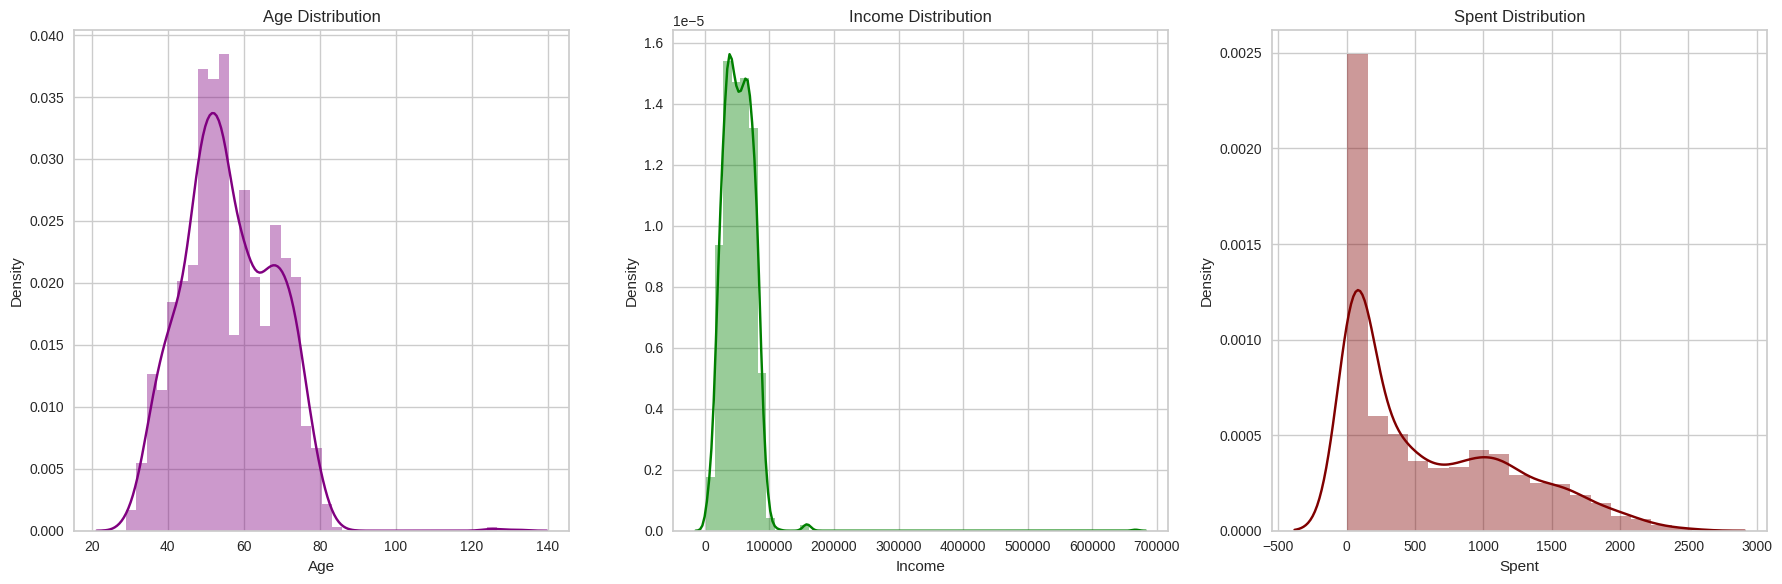

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

sns.distplot(data.Age, color='purple', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.distplot(data.Income, color='green', ax=axes[1])
axes[1].set_title('Income Distribution')

sns.distplot(data.Spent, color='maroon', ax=axes[2])
axes[2].set_title('Spent Distribution')

plt.tight_layout()  # used to adjust graphs
plt.show()


## **Categorical Variables Encoding**

In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']
#'O' stands for "object" dtype in pandas, which typically means the column contains text (strings) or mixed types, often used for categorical variables.

In [ ]:
# check the number of different labels
for var in categorical:
    print(data[var].value_counts() / float(len(data)))  #here var meaning any variable datatype
    print() # just for giving space



Education
Graduate         0.503610
Postgraduate     0.381769
Undergraduate    0.114621
Name: count, dtype: float64

Living_With
Partner    0.645307
Alone      0.354693
Name: count, dtype: float64



In [ ]:
data['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [ ]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [ ]:
data['Living_With'] = data['Living_With'].map({'Alone':0,'Partner':1})

In [ ]:
data.dtypes

,0
Education,int64
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
Wines,int64
Fruits,int64
Meat,int64
Fish,int64
Sweets,int64


In [ ]:
print(data['Education'].value_counts())

Education
1    1116
2     846
0     254
Name: count, dtype: int64


<Axes: >

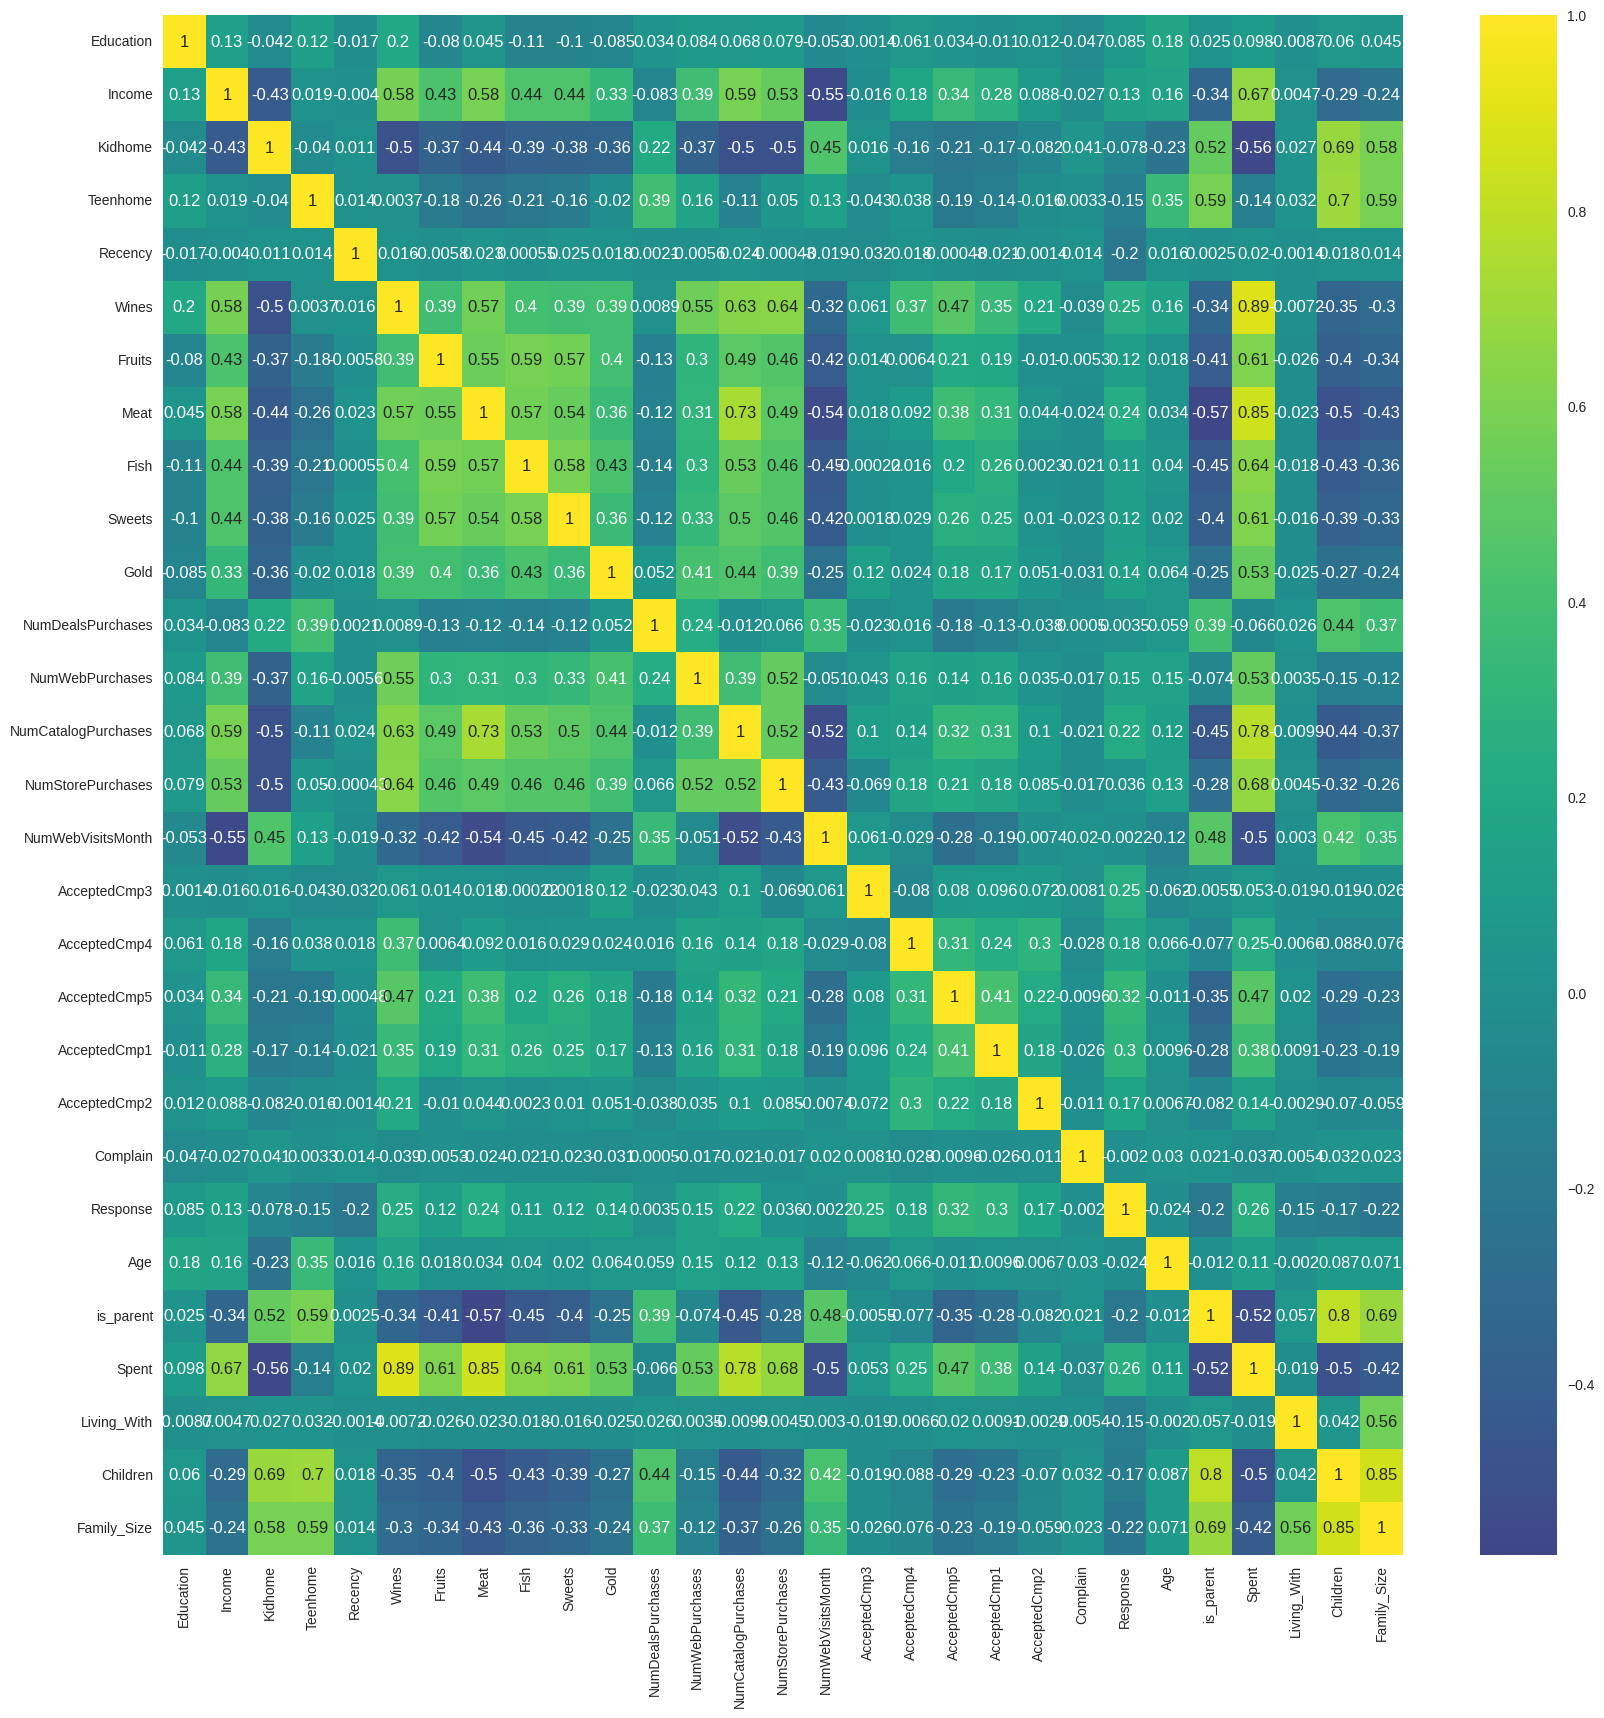

In [ ]:
corrmat = data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot = True, cmap = 'viridis', center = 0)

### **Feature Scaling**

In this section, numerical features are scaled.

StandardScaler =  (x−μ)/s

In [ ]:
data_old = data.copy()

In [ ]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)

In [ ]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,is_parent,Spent,Living_With,Children,Family_Size
0,-0.409776,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443,-1.581389,1.675488,-1.348829,-1.264803,-1.758673
1,-0.409776,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801,0.632356,-0.962358,-1.348829,1.405806,0.450009
2,-0.409776,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822,-1.581389,0.280250,0.741384,-1.264803,-0.654332
3,-0.409776,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-1.266777,0.632356,-0.919224,0.741384,0.070501,0.450009
4,1.124115,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-1.016420,0.632356,-0.307044,0.741384,0.070501,0.450009


## **Dimensionality Reduction**

In [ ]:
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [ ]:
W = p.components_.T
W

array([[ 0.01040881,  0.1383498 ,  0.49522437],
       [ 0.24306385,  0.16649081,  0.06521384],
       [-0.24866014,  0.00214804, -0.28858219],
       [-0.10362107,  0.45977583,  0.15876547],
       [ 0.0030292 ,  0.01528382, -0.03785187],
       [ 0.25661946,  0.2146136 ,  0.12303119],
       [ 0.24129084,  0.01735571, -0.25154097],
       [ 0.28779127,  0.01477833, -0.08059128],
       [ 0.25160231,  0.00616205, -0.25398051],
       [ 0.23968104,  0.02717363, -0.25785499],
       [ 0.19072231,  0.12987975, -0.18272192],
       [-0.08020365,  0.35287763, -0.13434551],
       [ 0.16767795,  0.30326017, -0.00530073],
       [ 0.27910657,  0.1111361 , -0.01679149],
       [ 0.24203268,  0.21081863,  0.01225678],
       [-0.22690601,  0.04636017, -0.07655414],
       [ 0.03668667,  0.22498891,  0.42798713],
       [-0.24732845,  0.28986021, -0.07407886],
       [ 0.32213589,  0.14029443, -0.03408129],
       [-0.02791581,  0.12706183, -0.32708347],
       [-0.25350819,  0.33555924, -0.091

In [ ]:
pd.DataFrame(W, index=data.columns, columns=['W1','W2','W3'])

,W1,W2,W3
Education,0.010409,0.138350,0.495224
Income,0.243064,0.166491,0.065214
Kidhome,-0.248660,0.002148,-0.288582
Teenhome,-0.103621,0.459776,0.158765
Recency,0.003029,0.015284,-0.037852
Wines,0.256619,0.214614,0.123031
Fruits,0.241291,0.017356,-0.251541
Meat,0.287791,0.014778,-0.080591
Fish,0.251602,0.006162,-0.253981
Sweets,0.239681,0.027174,-0.257855


In [ ]:
p.explained_variance_

array([8.11042806, 2.88992787, 1.42142267])

In [ ]:
p.explained_variance_ratio_

array([0.36848946, 0.13130108, 0.06458097])

In [ ]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

,Explained Variability
1,0.368489
2,0.131301
3,0.064581


In [ ]:
p.explained_variance_ratio_.cumsum()

array([0.36848946, 0.49979054, 0.5643715 ])

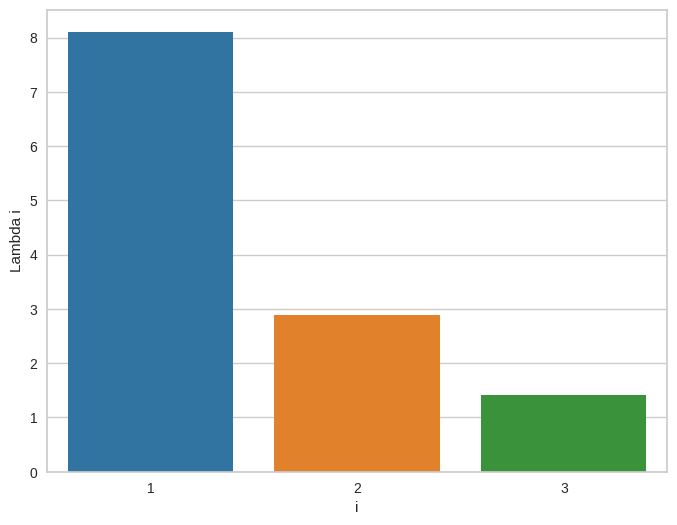

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = "tab10")
plt.xlabel('i')
plt.ylabel('Lambda i');

In [ ]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['col1', 'col2', 'col3']))

In [ ]:
data_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-2.565136e-17,2.847881,-5.818376,-2.494431,-0.777550,2.378863,7.376778
col2,2216.0,6.412841e-18,1.699979,-4.352801,-1.336552,-0.130344,1.223281,6.222828
col3,2216.0,-2.565136e-17,1.192234,-4.902613,-0.834280,0.013971,0.856157,3.499345


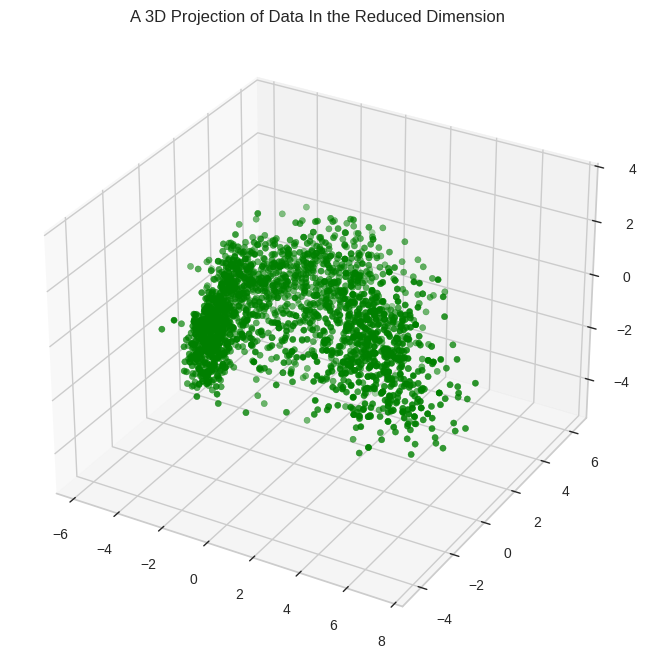

In [ ]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='green', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

## **Clustering**

To determine the number of clusters to be formed by Elbow method

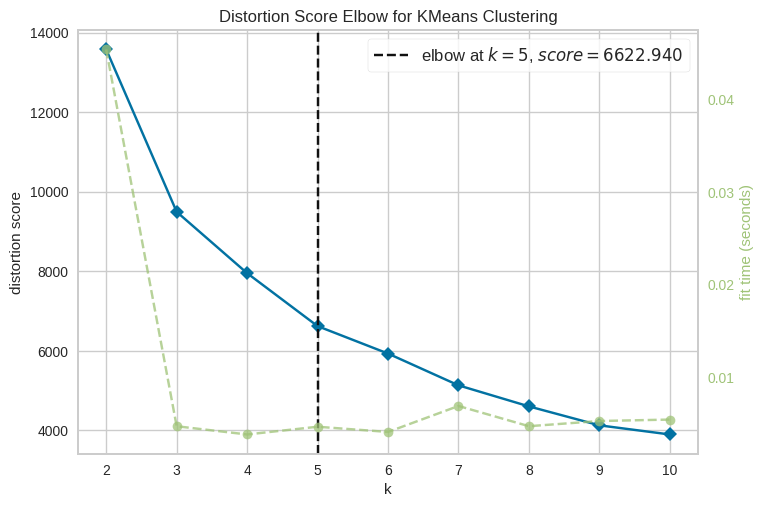

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_PCA)
Elbow_M.show()

In [ ]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data['Clusters'] = yhat_AC
data_old['Clusters'] = yhat_AC

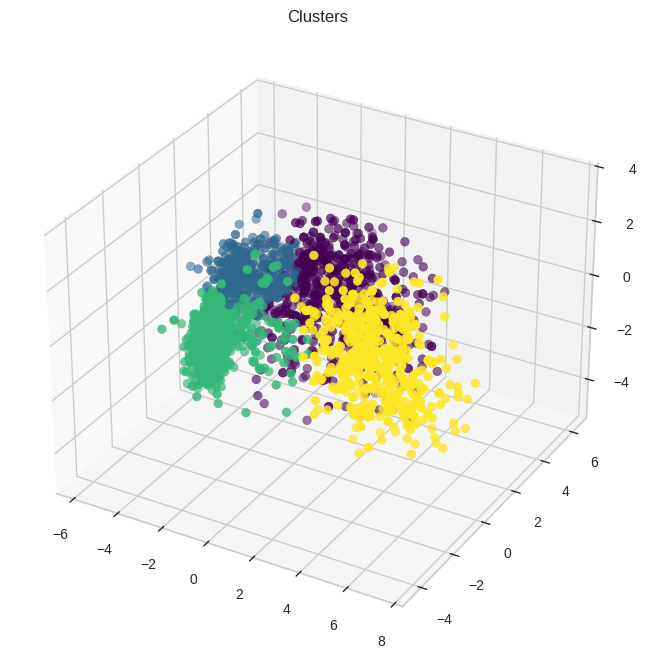

In [ ]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data_PCA['Clusters'], marker='o', cmap='viridis')
ax.set_title('Clusters')
plt.show()

# Clusters Analysis and Customer Profiling

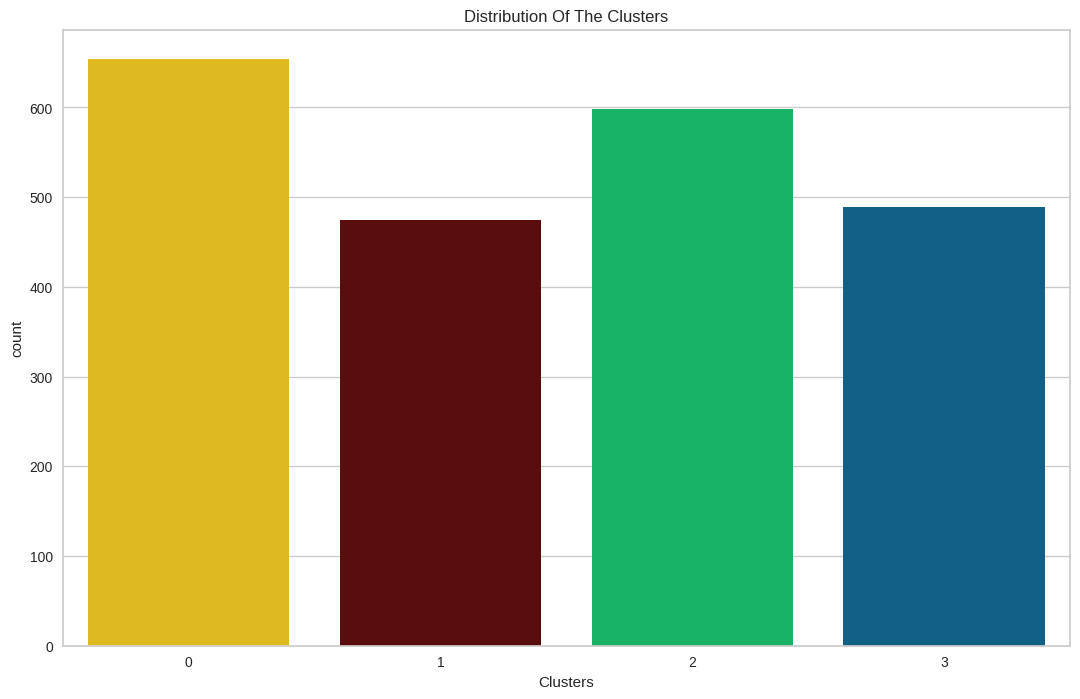

In [ ]:
pal = ['#ffcc00', '#660000', '#00cc66', '#006699']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

<Axes: xlabel='Clusters', ylabel='Spent'>

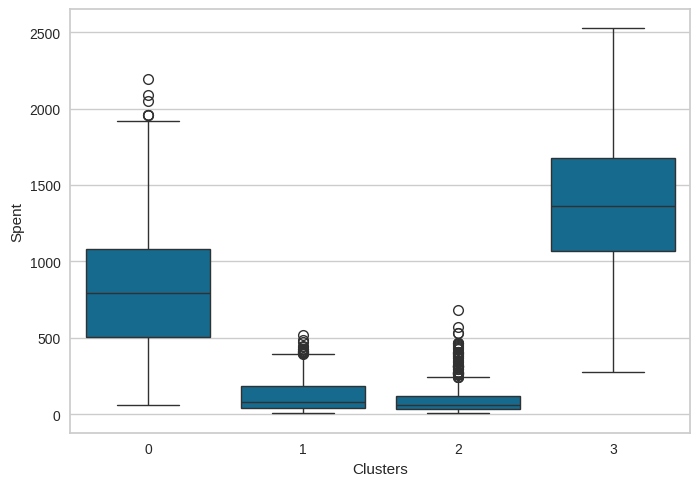

In [ ]:
avg_spending = data_old.groupby("Clusters")[["Spent"]].mean()
sns.boxplot(data=data_old, x="Clusters", y="Spent")

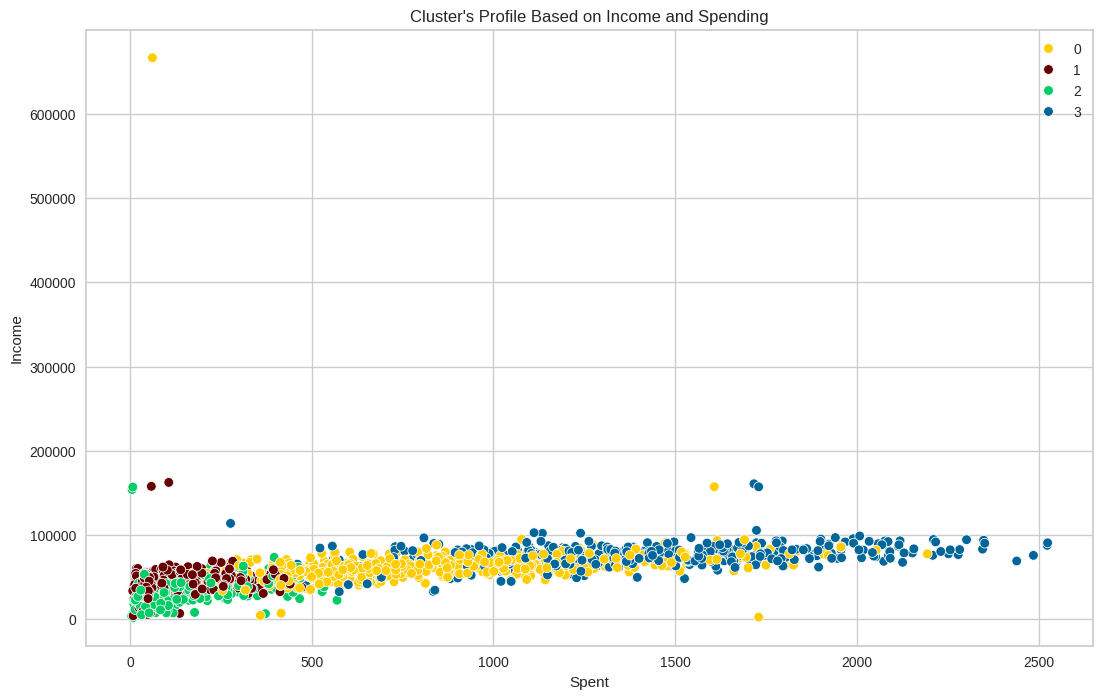

In [ ]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=data_old, x=data_old['Spent'], y=data_old['Income'], hue=data_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

Income vs spending plot shows the clusters pattern

group 1: high spending & average income

group 0: low spending & low income

group 3: low spending & average income

group 2: high spending & high income

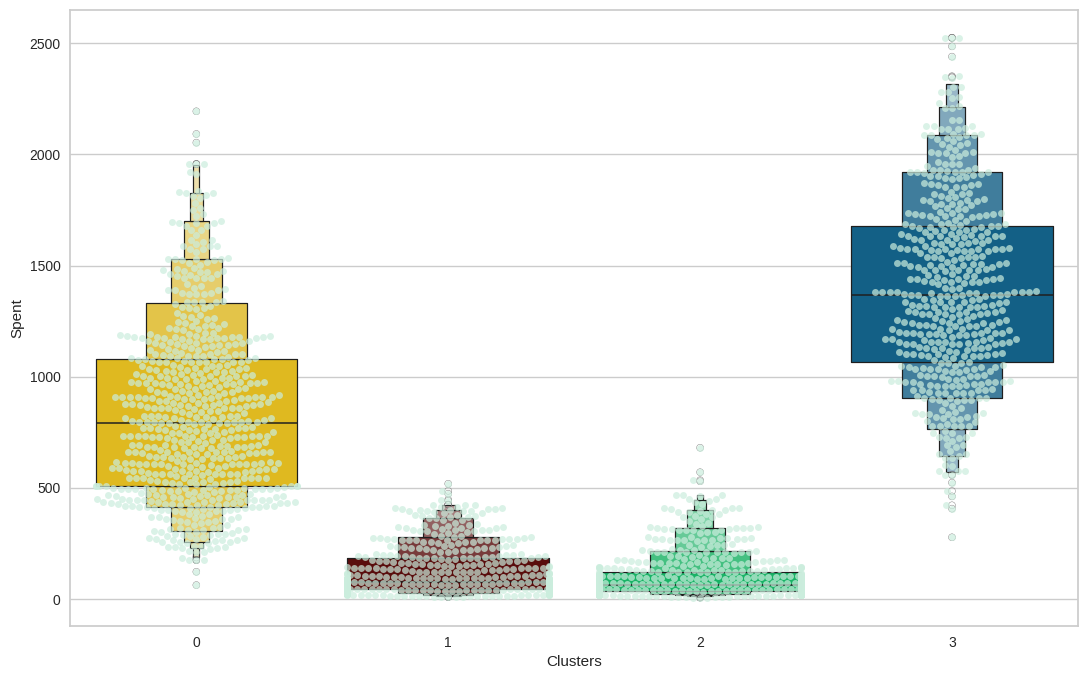

In [ ]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=data_old['Clusters'], y=data_old['Spent'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=data_old['Clusters'], y=data_old['Spent'], palette=pal)
plt.show();

From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 1. We can explore what each cluster is spending on for the targeted marketing strategies.

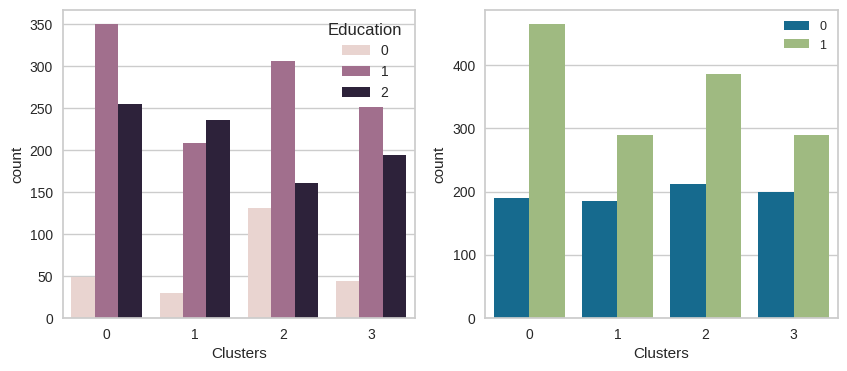

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=data_old, x="Clusters", hue="Education", ax=ax1)
sns.countplot(data=data_old, x="Clusters", hue="Living_With", ax=ax2)
ax2.legend(fontsize=9)

Plotting count of total campaign accepted.

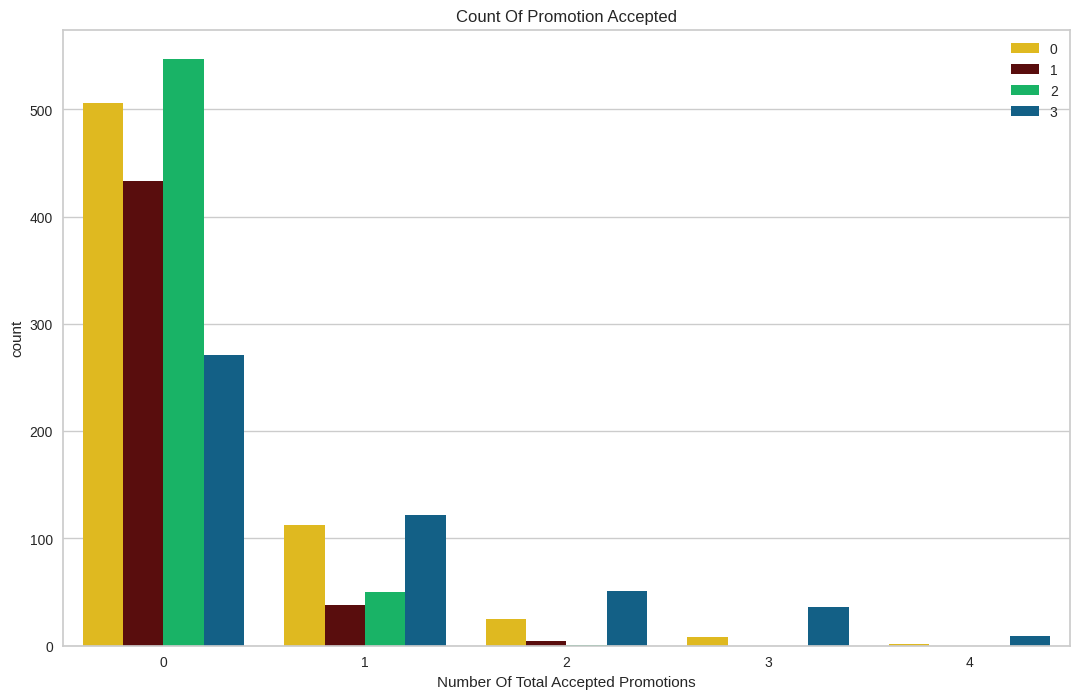

In [ ]:
data_old['Total_Promos'] = data_old['AcceptedCmp1']+ data_old['AcceptedCmp2']+ data_old['AcceptedCmp3']+ data_old['AcceptedCmp4']+ data_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data_old['Total_Promos'], hue=data_old['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

Plotting the number of deals purchased

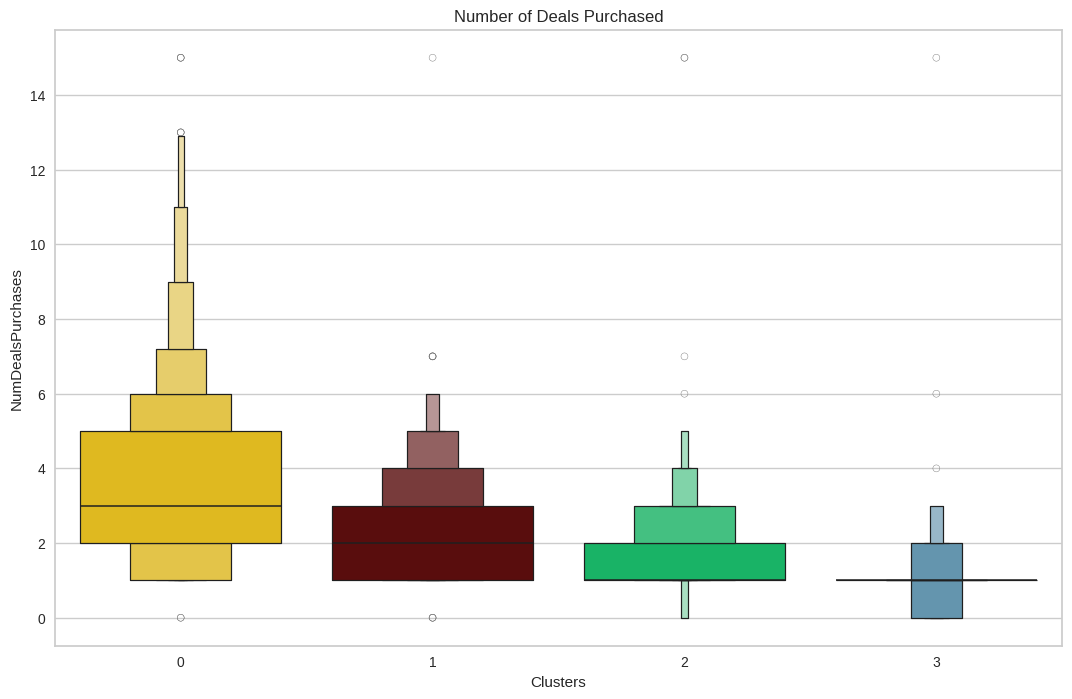

In [ ]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=data_old['NumDealsPurchases'],x=data_old['Clusters'], palette= pal)
pl.set_title('Number of Deals Purchased');

Unlike campaigns, the deals offered did well. It has best outcome with cluster 1 and cluster 3. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 0 overwhelmingly

<Figure size 1300x800 with 0 Axes>

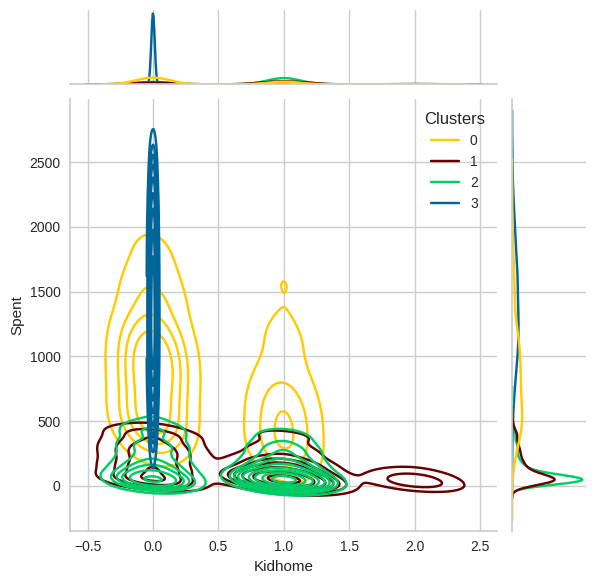

<Figure size 1300x800 with 0 Axes>

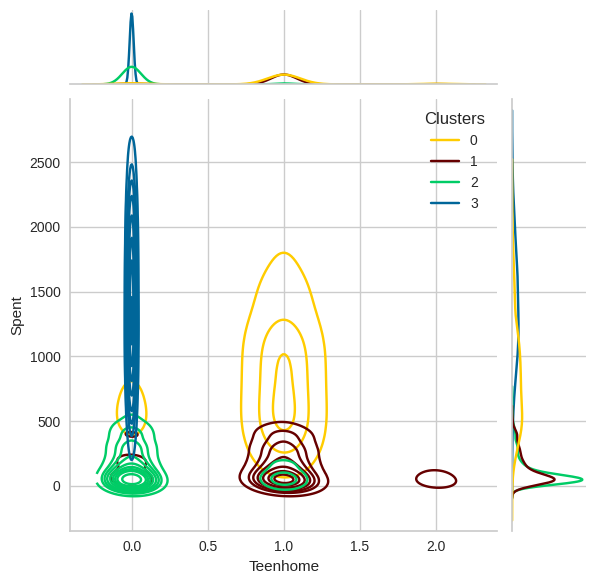

<Figure size 1300x800 with 0 Axes>

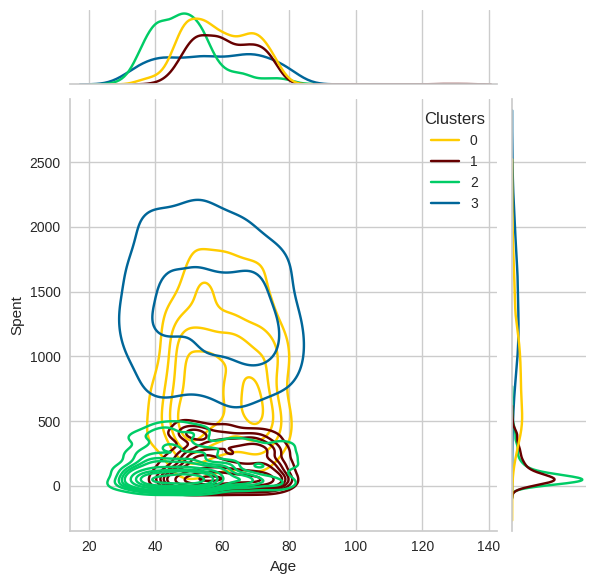

<Figure size 1300x800 with 0 Axes>

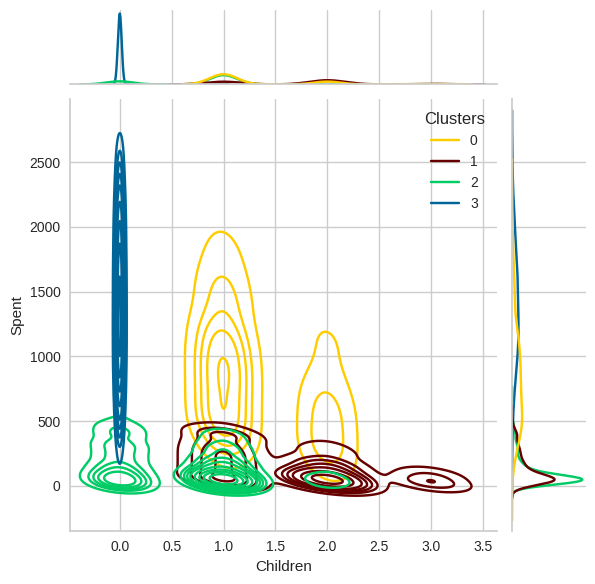

<Figure size 1300x800 with 0 Axes>

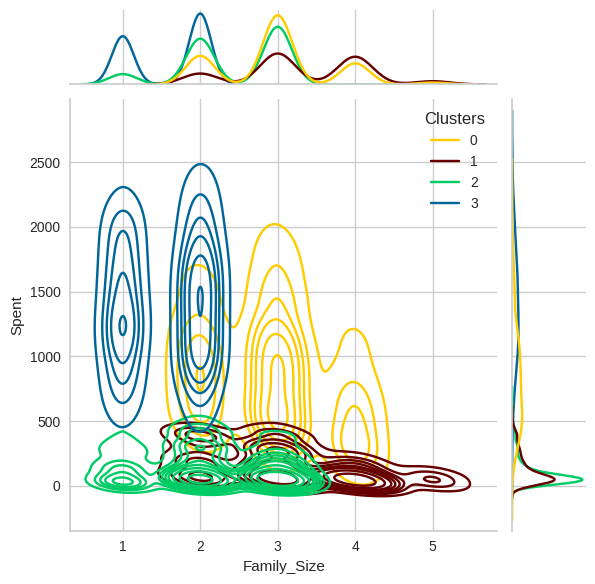

<Figure size 1300x800 with 0 Axes>

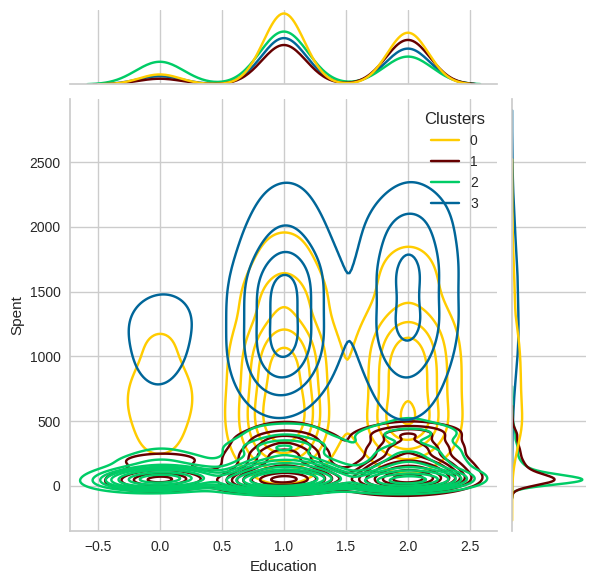

<Figure size 1300x800 with 0 Axes>

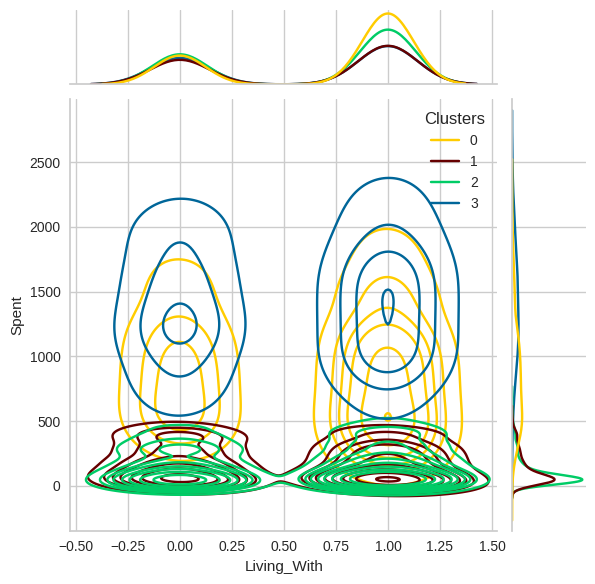

In [ ]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=data_old[i], y=data_old['Spent'], hue=data_old['Clusters'], kind='kde', palette=pal);

**About Cluster 0:**

Predominantly consists of individuals who are parents.
Families typically have a maximum of three members.
Most commonly have one child, and teenagers are not the norm.
Generally younger in age.

**About Cluster 1:**

Definitely includes parents.
Families range from having a minimum of two to a maximum of four members.
Often includes households with teenagers.
Single parents form a subgroup within this cluster.
Typically older in age.

**About Cluster 2:**

Certainly not composed of parents
Families have a maximum of two members.
Slightly more couples than single individuals.
Encompasses individuals of all age groups.
Characterized by high income and high spending.

**About Cluster 3:**

Clearly includes parents.
Families range from having a minimum of two to a maximum of five members
The majority have teenagers in the household
Generally, an older age group is represented.